## Centering
Centers the variable at zero and the variance to 1.

Subtracting the mean of each observation and divide by the standard deviation:

z = (x - x_mean) / std

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.4f}'.format

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [5]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6251)

X_train.shape, X_test.shape

((16512, 6), (4128, 6))

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,3.8725,28.6833,5.4166,1.0938,1421.2146,3.0211
std,1.9041,12.5946,2.2369,0.4413,1095.5284,6.4099
min,0.4999,1.0000,0.8889,0.3333,5.0000,0.6923
25%,2.5686,18.0000,4.4465,1.0062,786.0000,2.4304
50%,3.5330,29.0000,5.2345,1.0489,1161.0000,2.8168
75%,4.7386,37.0000,6.0524,1.0997,1721.0000,3.2802
max,15.0001,52.0000,132.5333,34.0667,16305.0000,599.7143


In [17]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7713,-2.1981,-2.0242,-1.7234,-1.2928,-0.3633
25%,-0.6848,-0.8483,-0.4337,-0.1987,-0.5798,-0.0922
50%,-0.1783,0.0251,-0.0814,-0.1018,-0.2375,-0.0319
75%,0.4549,0.6604,0.2842,0.0133,0.2737,0.0404
max,5.8442,1.8514,56.8292,74.7208,13.5864,93.0915


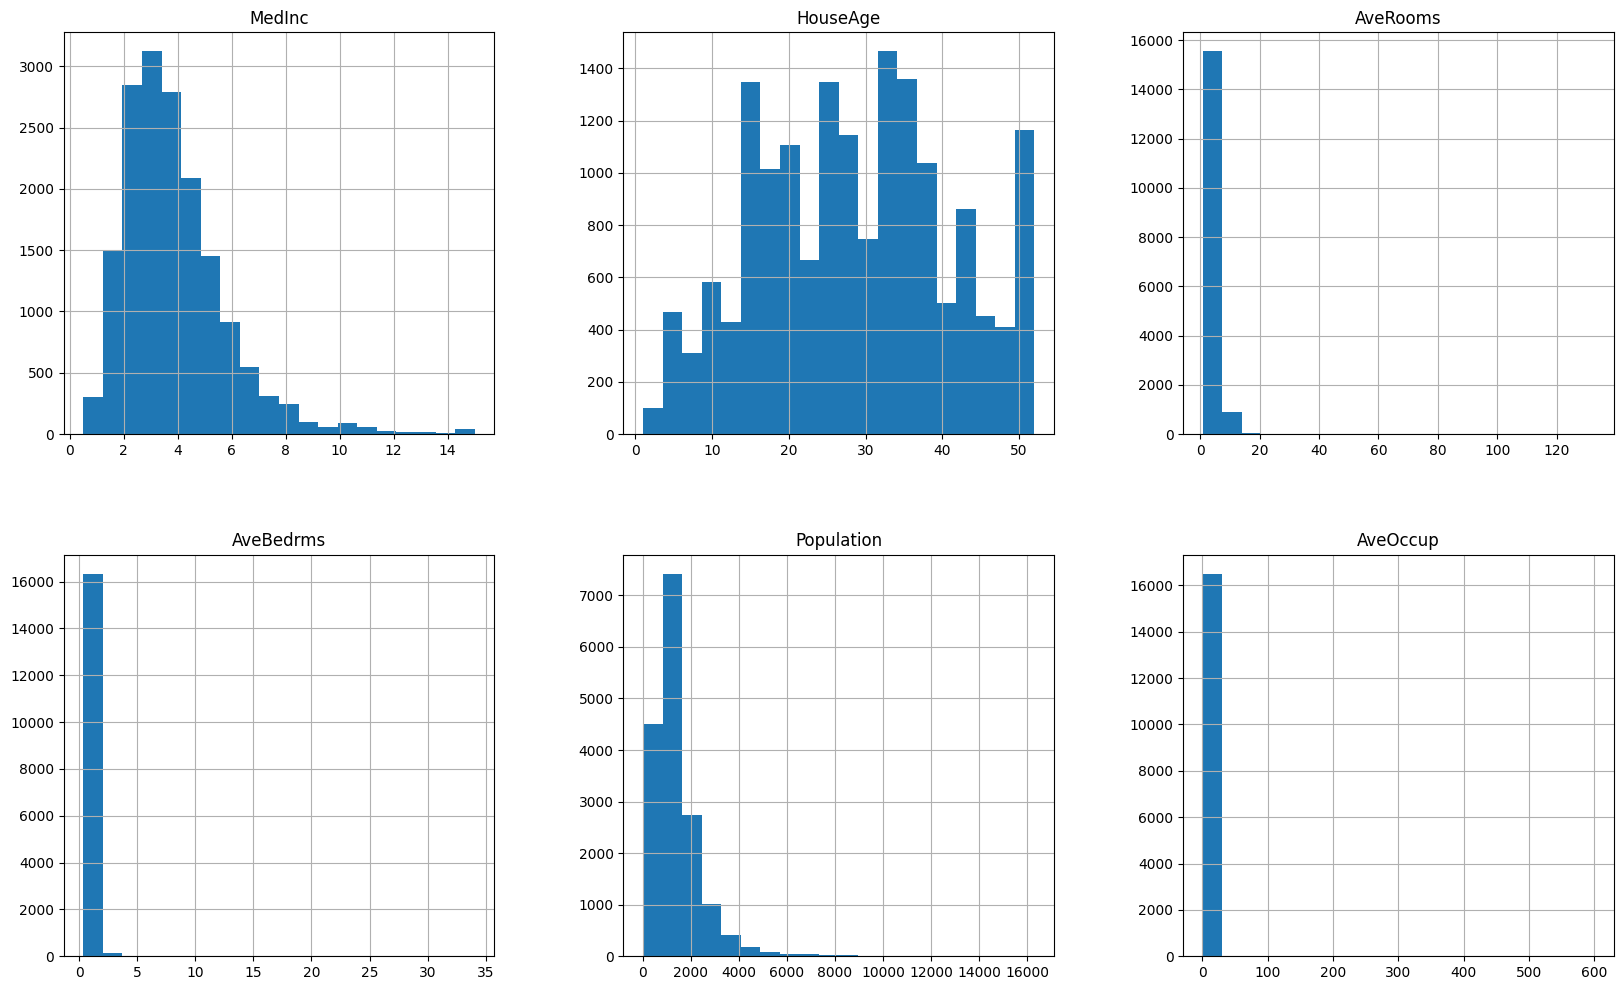

In [20]:
X_train.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

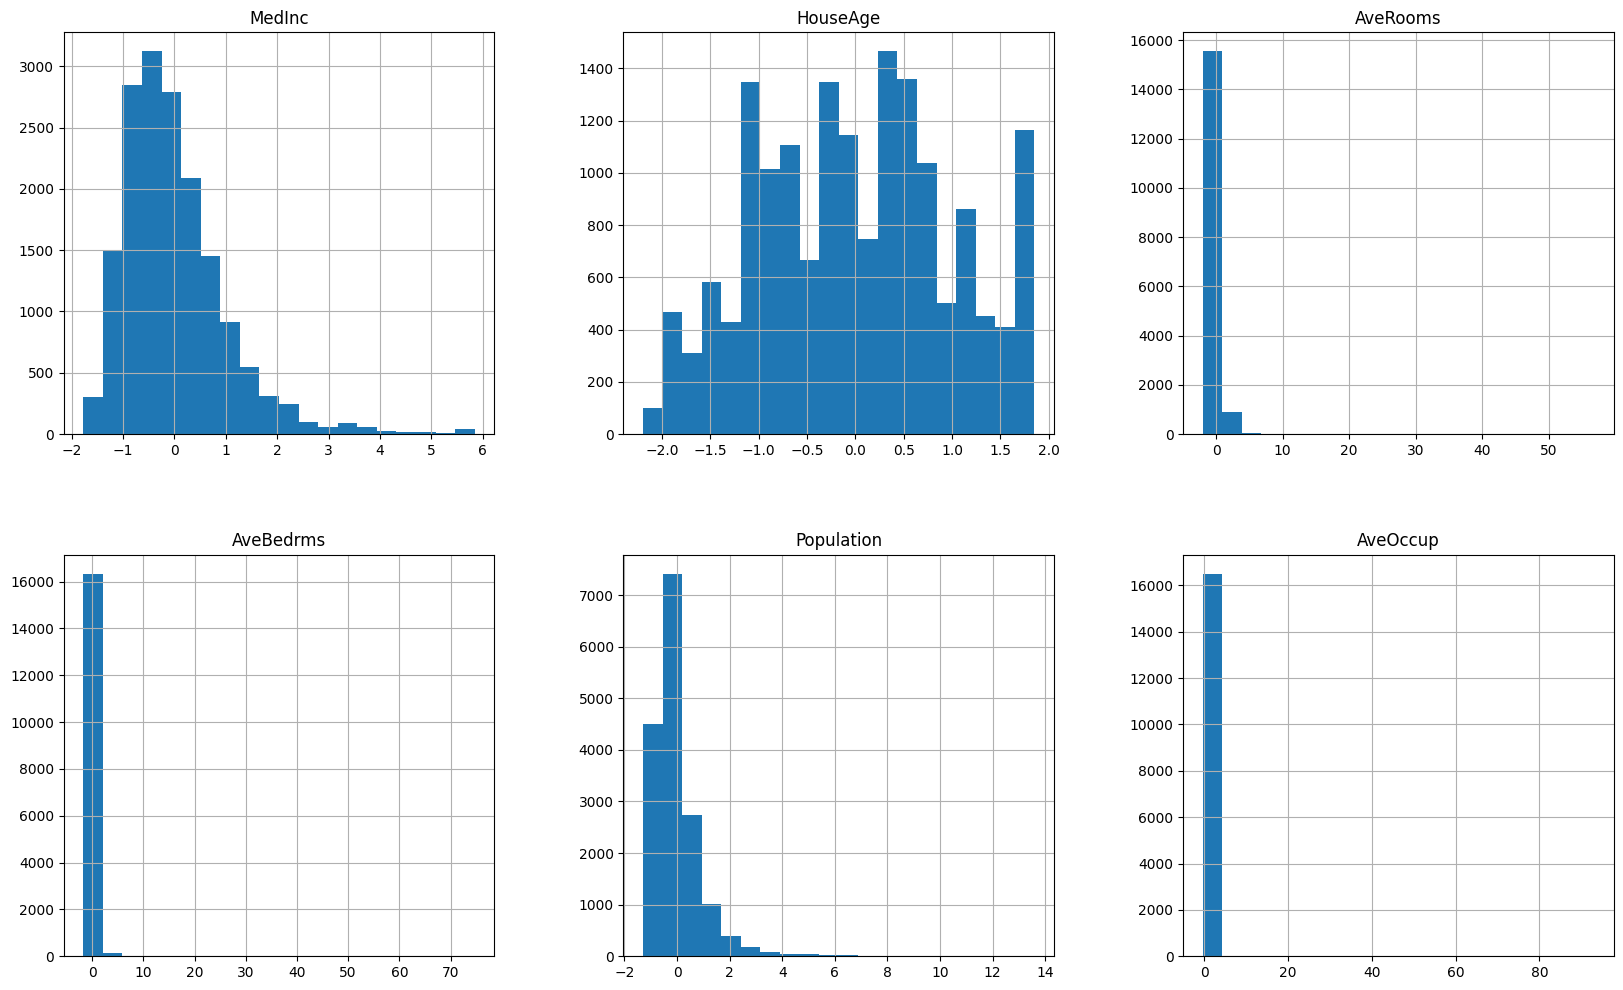

In [21]:
X_train_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

## Min Max Scaling
Pushes all values between 0 and 1. 
Subtract the min value from all observations then divide by the difference between min and max

$Xscaled = (X - X.min / (X.max - X.min)$


In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

MinMaxScaler()

In [26]:
X_train_scaled_min_max = min_max_scaler.transform(X_train)
X_test_scaled_min_max = min_max_scaler.transform(X_test)

In [27]:
X_train_scaled_min_max = pd.DataFrame(X_train_scaled_min_max, columns=X_train.columns)
X_test_scaled_min_max = pd.DataFrame(X_test_scaled_min_max, columns=X_test.columns)

In [29]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,3.8725,28.6833,5.4166,1.0938,1421.2146,3.0211
std,1.9041,12.5946,2.2369,0.4413,1095.5284,6.4099
min,0.4999,1.0000,0.8889,0.3333,5.0000,0.6923
25%,2.5686,18.0000,4.4465,1.0062,786.0000,2.4304
50%,3.5330,29.0000,5.2345,1.0489,1161.0000,2.8168
75%,4.7386,37.0000,6.0524,1.0997,1721.0000,3.2802
max,15.0001,52.0000,132.5333,34.0667,16305.0000,599.7143


In [28]:
X_train_scaled_min_max.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,0.2326,0.5428,0.0344,0.0225,0.0869,0.0039
std,0.1313,0.2470,0.0170,0.0131,0.0672,0.0107
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1427,0.3333,0.0270,0.0199,0.0479,0.0029
50%,0.2092,0.5490,0.0330,0.0212,0.0709,0.0035
75%,0.2923,0.7059,0.0392,0.0227,0.1053,0.0043
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


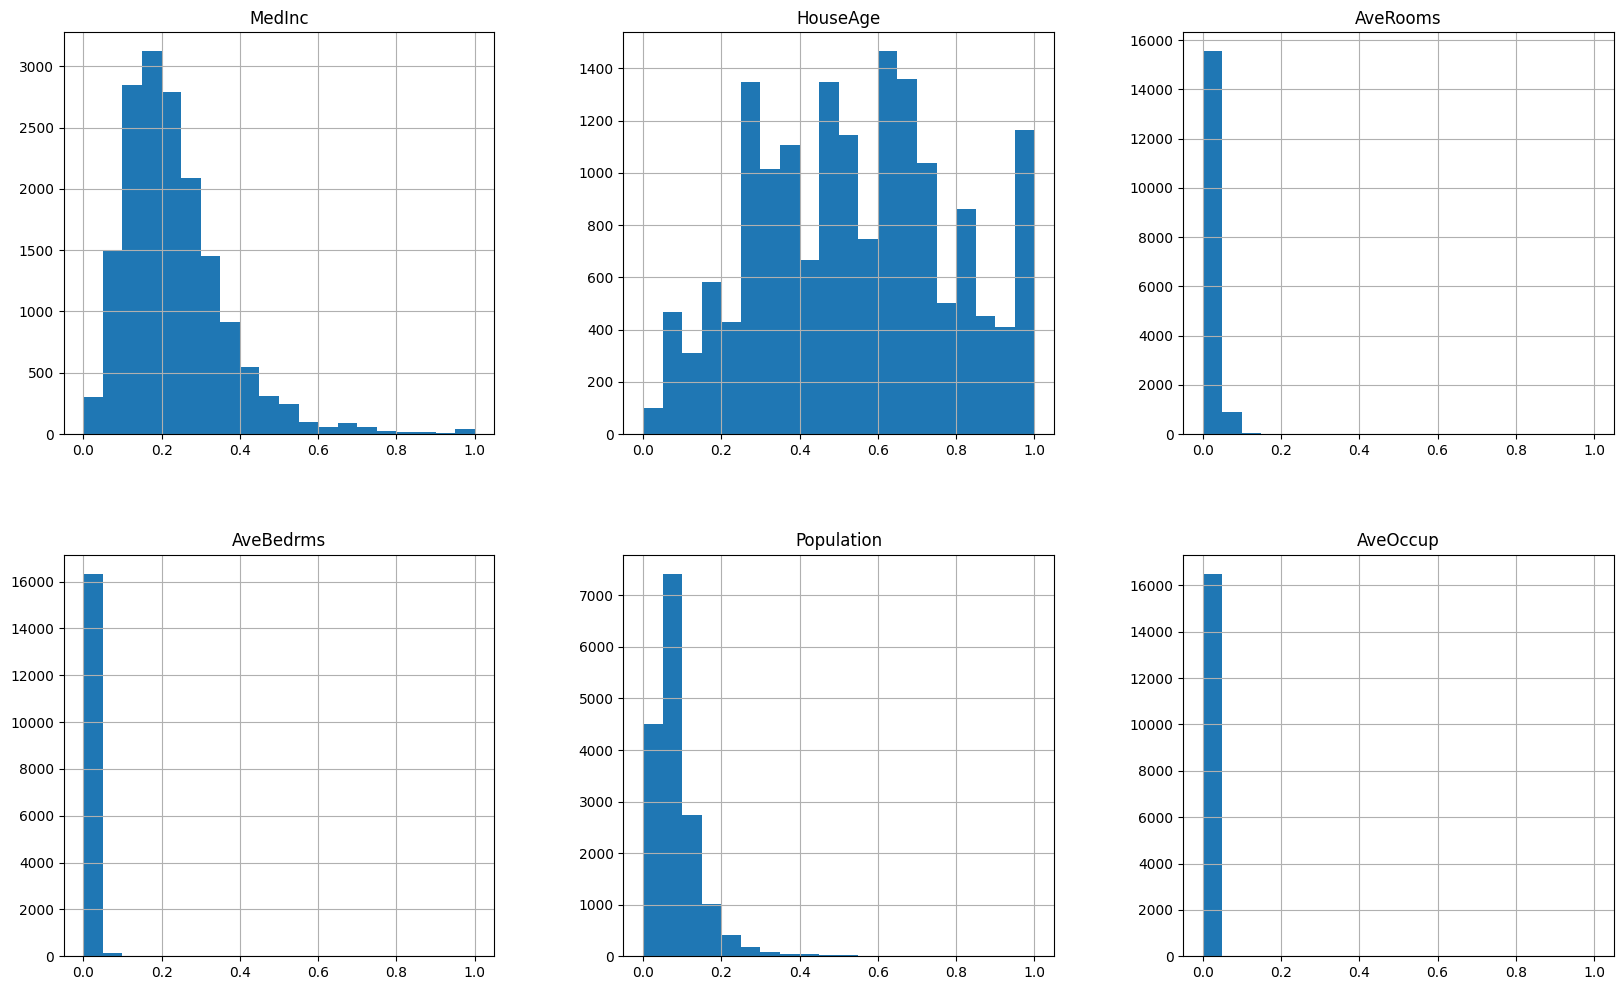

In [30]:
X_train_scaled_min_max.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()


## Mix and Match
There many other scalars in SciKit Learn that you could check out. 
You can create other scalers by mixing scalers. For example, you could combine centering with max-absolute scaling:

In [34]:
from sklearn.preprocessing import MaxAbsScaler

# Create a standard scalar as above but with_mean set to true
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(scaler_mean.transform(X_train))

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [36]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,3.8725,28.6833,5.4166,1.0938,1421.2146,3.0211
std,1.9041,12.5946,2.2369,0.4413,1095.5284,6.4099
min,0.4999,1.0000,0.8889,0.3333,5.0000,0.6923
25%,2.5686,18.0000,4.4465,1.0062,786.0000,2.4304
50%,3.5330,29.0000,5.2345,1.0489,1161.0000,2.8168
75%,4.7386,37.0000,6.0524,1.0997,1721.0000,3.2802
max,15.0001,52.0000,132.5333,34.0667,16305.0000,599.7143


In [35]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,0.1711,0.4550,0.0176,0.0134,0.0736,0.0107
min,-0.3031,-1.0000,-0.0356,-0.0231,-0.0952,-0.0039
25%,-0.1172,-0.3859,-0.0076,-0.0027,-0.0427,-0.0010
50%,-0.0305,0.0114,-0.0014,-0.0014,-0.0175,-0.0003
75%,0.0778,0.3004,0.0050,0.0002,0.0201,0.0004
max,1.0000,0.8423,1.0000,1.0000,1.0000,1.0000
